In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# First look-up and data preprocessing

In [2]:
df = pd.read_csv('yellow_tripdata_2016-05.csv')

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76


In [3]:
df = df[df['tpep_dropoff_datetime'] != df['tpep_pickup_datetime']]
df = df[df['passenger_count'] != 0]
df = df[df['trip_distance'] != 0]
df = df[df['pickup_longitude'] >= -74.25559]
df = df[df['pickup_longitude'] <= -73.70001]
df = df[df['pickup_latitude'] >= 40.49612]
df = df[df['pickup_latitude'] <= 40.91553]

In [4]:
df['tpep_pickup_datetime'] =  pd.to_datetime(df['tpep_pickup_datetime'], format='%Y%m%d %H:%M:%S.%f')
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].map(lambda x: x.replace(second=0))
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].map(lambda x: x.replace(minute=0))
df['tpep_dropoff_datetime'] =  pd.to_datetime(df['tpep_dropoff_datetime'], format='%Y%m%d %H:%M:%S.%f')
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].map(lambda x: x.replace(second=0))
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].map(lambda x: x.replace(minute=0))

In [7]:
trips_by_regions = pd.read_csv('regions.csv', sep=';', header=0)

In [9]:
%%time
for i in range(31*24):
    cur_datetime = df['tpep_pickup_datetime'].values[0] + np.timedelta64(i, 'h')
    df_cut_datetime = df[df['tpep_pickup_datetime'] == cur_datetime]
    ret = stats.binned_statistic_2d( df_cut_datetime['pickup_longitude'],  df_cut_datetime['pickup_latitude'],
                      None,  statistic='count',
                      bins=[np.linspace(-74.25559, -73.70001, 51) , np.linspace(40.49612, 40.91553, 51)])
    trips_by_regions[(str(cur_datetime)[:10] + '(hour: {})'.format(i%24))] = ret.statistic.reshape(2500)
    if i%24==0 and i!=0:
        print('day {}'.format(i/24))

C:\Users\Aqice\AppData\Roaming\Python\Python36\site-packages\scipy\stats\_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


day 1.0
day 2.0
day 3.0
day 4.0
day 5.0
day 6.0
day 7.0
day 8.0
day 9.0
day 10.0
day 11.0
day 12.0
day 13.0
day 14.0
day 15.0
day 16.0
day 17.0
day 18.0
day 19.0
day 20.0
day 21.0
day 22.0
day 23.0
day 24.0
day 25.0
day 26.0
day 27.0
day 28.0
day 29.0
day 30.0
Wall time: 38.8 s


In [10]:
trips_by_regions.head()

,region,west,east,south,north,2016-05-01(hour: 0),2016-05-01(hour: 1),2016-05-01(hour: 2),2016-05-01(hour: 3),2016-05-01(hour: 4),...,2016-05-31(hour: 14),2016-05-31(hour: 15),2016-05-31(hour: 16),2016-05-31(hour: 17),2016-05-31(hour: 18),2016-05-31(hour: 19),2016-05-31(hour: 20),2016-05-31(hour: 21),2016-05-31(hour: 22),2016-05-31(hour: 23)
0,1,-74.25559,-74.244478,40.496120,40.504508,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,-74.25559,-74.244478,40.504508,40.512896,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,-74.25559,-74.244478,40.512896,40.521285,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,-74.25559,-74.244478,40.521285,40.529673,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,-74.25559,-74.244478,40.529673,40.538061,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# find out a cell with Empire State Building
EMB_lon = 40.748460
EMB_lat = -73.985779
EMB_region = trips_by_regions[(trips_by_regions['west'] <= EMB_lat) & (EMB_lat <= trips_by_regions['east'])
                             & (trips_by_regions['south'] <= EMB_lon) & (EMB_lon <= trips_by_regions['north'])]

In [12]:
EMB_region

,region,west,east,south,north,2016-05-01(hour: 0),2016-05-01(hour: 1),2016-05-01(hour: 2),2016-05-01(hour: 3),2016-05-01(hour: 4),...,2016-05-31(hour: 14),2016-05-31(hour: 15),2016-05-31(hour: 16),2016-05-31(hour: 17),2016-05-31(hour: 18),2016-05-31(hour: 19),2016-05-31(hour: 20),2016-05-31(hour: 21),2016-05-31(hour: 22),2016-05-31(hour: 23)
1230,1231,-73.988912,-73.9778,40.747766,40.756154,881.0,713.0,533.0,418.0,353.0,...,1009.0,814.0,748.0,879.0,1093.0,1094.0,997.0,1099.0,874.0,608.0


In [13]:
EMB_hour_progression = EMB_region.drop(['region', 'west', 'east', 'north', 'south'], axis=1)

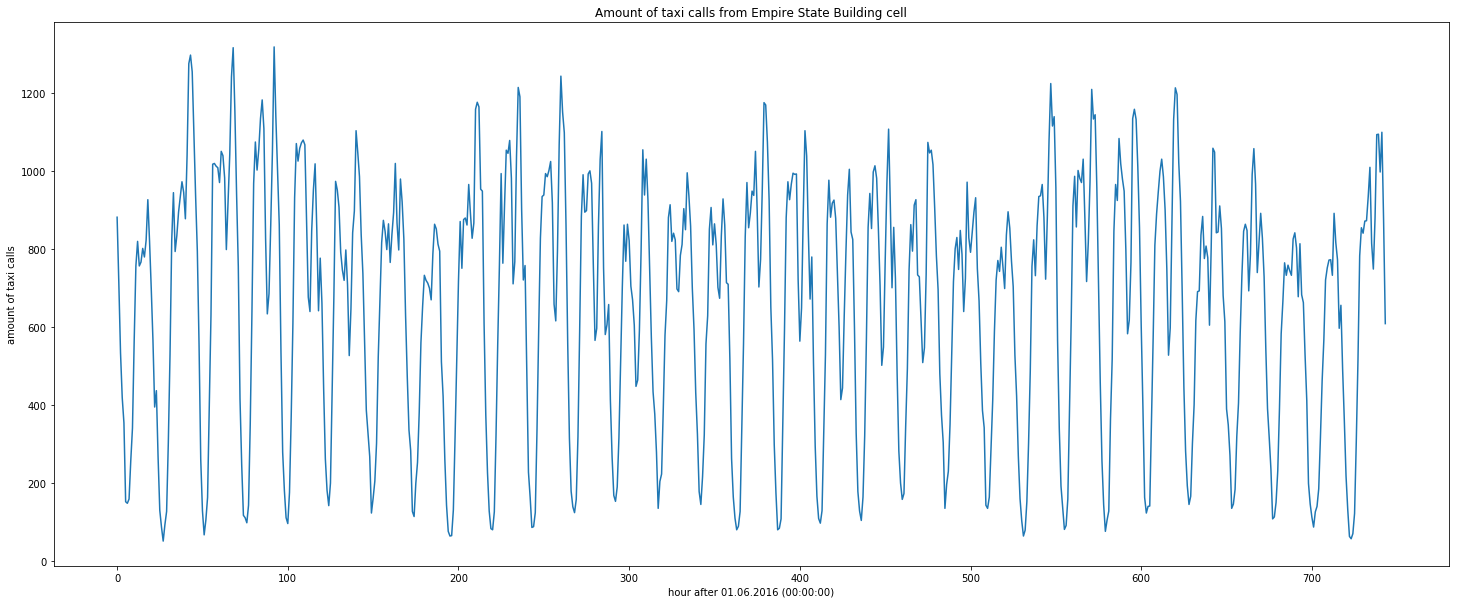

In [14]:
plt.figure(figsize(25,10))
plt.plot(EMB_hour_progression.values[0])
plt.xlabel('hour after 01.06.2016 (00:00:00)')
plt.ylabel('amount of taxi calls')
plt.title('Amount of taxi calls from Empire State Building cell')
plt.show()

In [15]:
amount_of_zeros = 0
for i in trips_by_regions.values:
    for j in i:
        if j == 0:
            amount_of_zeros += 1

In [16]:
print('zero cells: {}'.format(amount_of_zeros))

zero cells: 1718238


In [19]:
trips_by_regions.to_csv('trips_by_regions.csv', index_label=False)